In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [2]:
filename = 'Schuhe Menschen.xlsx'
my_xlsx_data = pd.read_excel(filename)

In [3]:
my_xlsx_data

,Körpergröße,Gewicht,Schuhgröße
0,165,49,36.5
1,168,68,37.0
2,172,77,39.5
3,174,65,37.5
4,170,58,37.5
5,171,62,38.0
6,164,61,36.0
7,173,71,38.5
8,169,50,37.0
9,163,74,37.0


# pearson correlation

In [4]:
# proof of wich two columns have a correlation to shoesize
# np.corrcoef(x, y)
x = np.array(my_xlsx_data['Körpergröße'])
y = np.array(my_xlsx_data['Gewicht'])
z = np.array(my_xlsx_data['Schuhgröße'])

In [5]:
shoe_df = pd.DataFrame([x,y,z]).T
shoe_df

,0,1,2
0,165.0,49.0,36.5
1,168.0,68.0,37.0
2,172.0,77.0,39.5
3,174.0,65.0,37.5
4,170.0,58.0,37.5
5,171.0,62.0,38.0
6,164.0,61.0,36.0
7,173.0,71.0,38.5
8,169.0,50.0,37.0
9,163.0,74.0,37.0


In [6]:
r_x_z = np.corrcoef(x, z)
r_x_z[1,0]

0.7411253770427023

In [7]:
r_y_z = np.corrcoef(y, z)
r_y_z[1,0]

0.5956459068799445

In [8]:
#more simple .corr() method
my_xlsx_data.corr()

,Körpergröße,Gewicht,Schuhgröße
Körpergröße,1.000000,0.222000,0.741125
Gewicht,0.222000,1.000000,0.595646
Schuhgröße,0.741125,0.595646,1.000000


In [9]:
# calculation with formula
n=len(x)
r_y_z_m = (n*sum(y*z)-sum(y)*sum(z))/(math.sqrt(n*sum(y**2)-sum(y)**2)*math.sqrt(n*sum(z**2)-sum(z)**2))
r_y_z_m

0.5956459068799445

In [10]:
n=len(x)
r_x_z_m = (n*sum(x*z)-sum(x)*sum(z))/(math.sqrt(n*sum(x**2)-sum(x)**2)*math.sqrt(n*sum(z**2)-sum(z)**2))
r_x_z_m
#  high and shoesize correlate better

0.7411253770427021

# linear regression

In [11]:
# Funktion for the line of linear regression
def lin_reg(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    return pd.DataFrame(m*x+b,my_xlsx_data['Schuhgröße'])

<AxesSubplot: xlabel='Schuhgröße', ylabel='Körpergröße'>

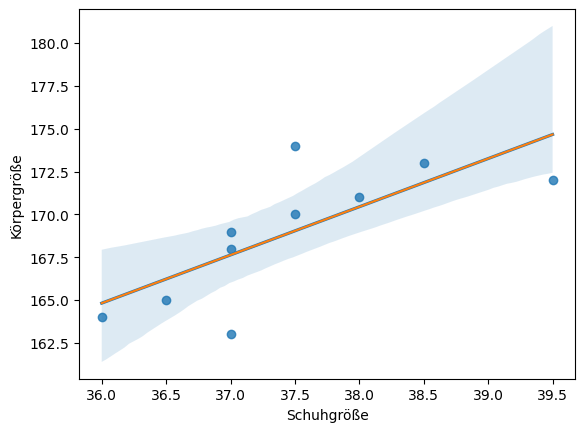

In [12]:
# does the function lin_reg(x,y) work?
sns.regplot(data = my_xlsx_data, x = 'Schuhgröße', y= 'Körpergröße')
sns.lineplot(data = lin_reg(z,x),x = 'Schuhgröße',y = 0)

In [13]:
# Function for m and b of y = m*x +b
def lin_reg_m_b(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    return [m,b]

In [14]:
# Prognostic function
m = lin_reg_m_b(z,x)[0]
b = lin_reg_m_b(z,x)[1]
def lin_reg_prog(x):
    return m*x+b

In [15]:
# shoesize 41 should be around the high of...
lin_reg_prog(41)

178.8861788617886

# Who good are our prognostic's with regression ?

In [16]:
data = pd.DataFrame([[1,2,3,4,5],[4,6,7,9,10]]).T
data.columns = ['x','y']
data.set_index('x', inplace = True)
data

,y
x,
1,4
2,6
3,7
4,9
5,10


In [17]:
n=len(data['y'])
def lin_reg_m_b(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    return [m,b]

In [18]:
lin_reg_m_b(data.index,data['y'])

[1.5, 2.7]

In [19]:
# given Regression line
def y(x):
    return 1.5*x+2.7

## residual / Residuen

In [20]:
# one residual e_i is the differenz between data and prognostic
e_1 = data['y'][1]-y(1)
e_1

-0.20000000000000018

In [21]:
# the sum of residuals is 0 because of definition of regression line
round(sum(pd.array(data['y'])-pd.array(y(data.index))),14)
# here because of floats inaccurate beginning bei deciaml number 15

0.0

# MSE / Mean squared error / mittlerer quadratischer Fehler

In [22]:
# square residual:
e_1 = (data['y'][1]-y(1))**2
e_1

0.04000000000000007

In [23]:
# MSE it is just the mean over the square residual:
round(st.mean((pd.array(data['y'])-pd.array(y(data.index)))**2),14)
# MSE is more perseptive to outliers

0.06

## MAE / mean absolut error / mittlere absolute Fehler

In [24]:
# absolute residual:
e_1 = abs(data['y'][1]-y(1))
e_1

0.20000000000000018

In [25]:
# MSA it is just the mean over the absolute residual:
round(st.mean(abs(pd.array(data['y'])-pd.array(y(data.index)))),14)

0.24

## Coefficient of Determination

In [27]:
my_xlsx_data

,Körpergröße,Gewicht,Schuhgröße
0,165,49,36.5
1,168,68,37.0
2,172,77,39.5
3,174,65,37.5
4,170,58,37.5
5,171,62,38.0
6,164,61,36.0
7,173,71,38.5
8,169,50,37.0
9,163,74,37.0


In [28]:
# for simple models like linear regression Coefficient of Determination is square pearson-Coefficient
r_x_z_m

0.7411253770427021

In [31]:
r_x_z_m_sq = r_x_z_m**2
r_x_z_m_sq

0.5492668244966873

In [33]:
# manual callculation of the lin regression
n=len(my_xlsx_data['Schuhgröße'])
def lin_reg_m_b(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    return [m,b]

In [34]:
lin_reg_m_b(my_xlsx_data['Schuhgröße'],my_xlsx_data['Körpergröße'])

[2.813008130081301, 63.55284552845528]

In [35]:
m = lin_reg_m_b(my_xlsx_data['Schuhgröße'],my_xlsx_data['Körpergröße'])[0]
b = lin_reg_m_b(my_xlsx_data['Schuhgröße'],my_xlsx_data['Körpergröße'])[1]
def y(x):
    return m*x+b

In [44]:
# making copy vor merging mean and linear regression
data1 = my_xlsx_data.copy()
data1.head()

,Körpergröße,Gewicht,Schuhgröße
0,165,49,36.5
1,168,68,37.0
2,172,77,39.5
3,174,65,37.5
4,170,58,37.5


In [47]:
data1['lin Regression'] = y(data1['Schuhgröße'])
data1['mean'] = data1['Körpergröße'].mean()

In [48]:
data1

,Körpergröße,Gewicht,Schuhgröße,lin Regression,mean
0,165,49,36.5,166.227642,168.9
1,168,68,37.0,167.634146,168.9
2,172,77,39.5,174.666667,168.9
3,174,65,37.5,169.040650,168.9
4,170,58,37.5,169.040650,168.9
5,171,62,38.0,170.447154,168.9
6,164,61,36.0,164.821138,168.9
7,173,71,38.5,171.853659,168.9
8,169,50,37.0,167.634146,168.9
9,163,74,37.0,167.634146,168.9


In [54]:
# So, Coefficient of Determination is the portion that is distinct from mean at square residuals
SQR = sum((data1['Körpergröße']-data1['lin Regression'])**2)
TQS = sum((data1['Körpergröße']-data1['mean'])**2)

In [55]:
SQR

59.90243902439024

In [56]:
TQS

132.9

In [57]:
1-SQR/TQS

0.5492668244966874

In [59]:
r_x_z_m_sq

0.5492668244966873

## RMSE / Root mean square error

In [60]:
data1

,Körpergröße,Gewicht,Schuhgröße,lin Regression,mean
0,165,49,36.5,166.227642,168.9
1,168,68,37.0,167.634146,168.9
2,172,77,39.5,174.666667,168.9
3,174,65,37.5,169.040650,168.9
4,170,58,37.5,169.040650,168.9
5,171,62,38.0,170.447154,168.9
6,164,61,36.0,164.821138,168.9
7,173,71,38.5,171.853659,168.9
8,169,50,37.0,167.634146,168.9
9,163,74,37.0,167.634146,168.9


In [63]:
# RMSE = sqrt(MSE) 
math.sqrt(st.mean((pd.array(data1['Körpergröße'])-pd.array(y(data1['Schuhgröße'])))**2))

2.447497477514333

In [70]:
# Tunnel [regression-RSME,regression+RSME] has 68% of data
data1['upper_limit'] = data1['lin Regression'] + math.sqrt(st.mean((pd.array(data1['Körpergröße'])-pd.array(y(data1['Schuhgröße'])))**2))
data1['lower_limit'] = data1['lin Regression'] - math.sqrt(st.mean((pd.array(data1['Körpergröße'])-pd.array(y(data1['Schuhgröße'])))**2))

In [71]:
data1.head()

,Körpergröße,Gewicht,Schuhgröße,lin Regression,mean,upper_limit,lower_limit
0,165,49,36.5,166.227642,168.9,168.675140,163.780145
1,168,68,37.0,167.634146,168.9,170.081644,165.186649
2,172,77,39.5,174.666667,168.9,177.114164,172.219169
3,174,65,37.5,169.040650,168.9,171.488148,166.593153
4,170,58,37.5,169.040650,168.9,171.488148,166.593153


<AxesSubplot: xlabel='Schuhgröße', ylabel='Körpergröße'>

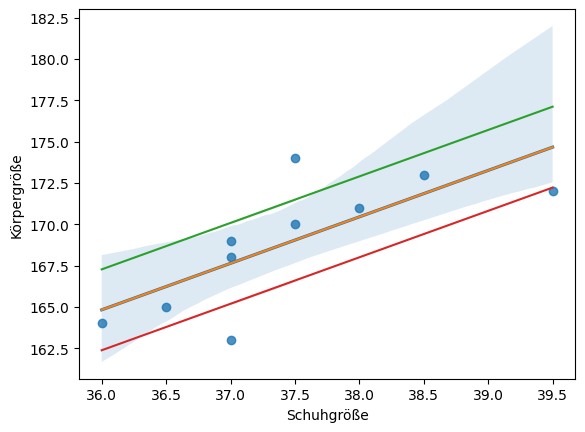

In [72]:
sns.regplot(data = data1, x = 'Schuhgröße', y= 'Körpergröße')
sns.lineplot(data = data1,x = 'Schuhgröße',y = 'lin Regression')
sns.lineplot(data = data1,x = 'Schuhgröße',y = 'upper_limit')
sns.lineplot(data = data1,x = 'Schuhgröße',y = 'lower_limit')